In [77]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(2,8)

# Read data in

df = pd.read_csv("Movies.csv",header=0)

In [78]:
#looking at top 5 rows of dataframe
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [79]:
#Analyzing missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    print('{} - {}%'.format(col,pct_missing))


name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [80]:
#Impute Budget & Gross Missing Values with Median

df[['budget', 'gross']] = df[['budget', 'gross']].fillna(df[['budget', 'gross']].median())

In [81]:
#Data types of our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [82]:
# Changing date types

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [83]:
#rows X Columns
df.shape

(7668, 15)

In [84]:
# count of missing in column rating
df['released'].isnull().sum()
# remove 2 rows that are missing released date
df.dropna(subset=['released'],inplace=True)

In [85]:
# Separating date_release form country

df[['date_release','country']] = df['released'].astype(str).str.split("(", expand=True)
df['date_release'] = df['date_release'].str[:-1]
df['country'] = df['country'].str[:-1]


In [86]:
#separate date and year

df[['date_release', 'year_release']] = df['date_release'].astype(str).str.split(", ", expand = True)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_release,year_release
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,June 13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July 2,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July 25,1980


In [87]:
#looking at sorting values by Gross
df.sort_values(by=['gross'],inplace=False,ascending=False).head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_release,year_release
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,December 18,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,April 26,2019


In [88]:
#option that allows to show all rows
pd.set_option('display.max_rows',None)

In [89]:
#Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

In [90]:
df.drop_duplicates().head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_release,year_release
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,June 13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,1980


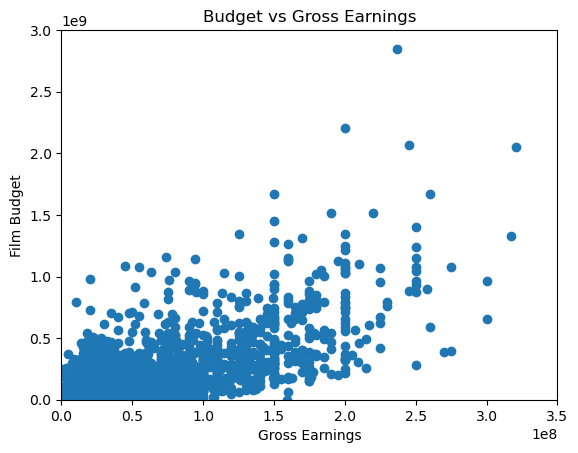

In [91]:
# Scatter Plot of Budget vs Gross
matplotlib.rc_file_defaults()
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')

plt.xlim(0,350000000)
plt.ylim(0,3000000000)
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

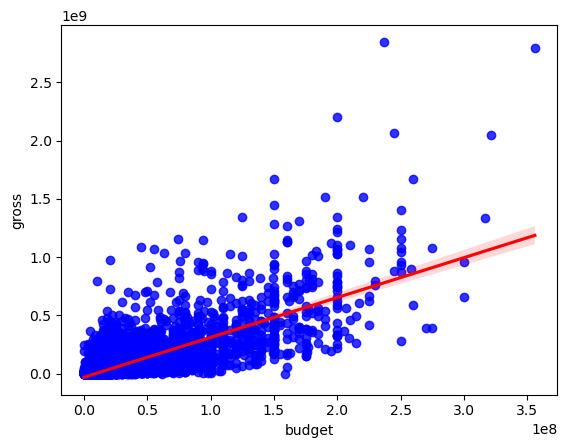

In [92]:
#fit a linear regression line

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"blue"},line_kws={"color":"red"})

In [93]:
#shows cross correlations
#high correlation between gross and budget
#high correlation between votes and budget

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.098171,0.222952,0.291789,0.259611,0.120811
score,0.098171,1.000000,0.409221,0.061928,0.185534,0.399451
votes,0.222952,0.409221,1.000000,0.460943,0.632119,0.309212
budget,0.291789,0.061928,0.460943,1.000000,0.745875,0.273363
gross,0.259611,0.185534,0.632119,0.745875,1.000000,0.244360
runtime,0.120811,0.399451,0.309212,0.273363,0.244360,1.000000


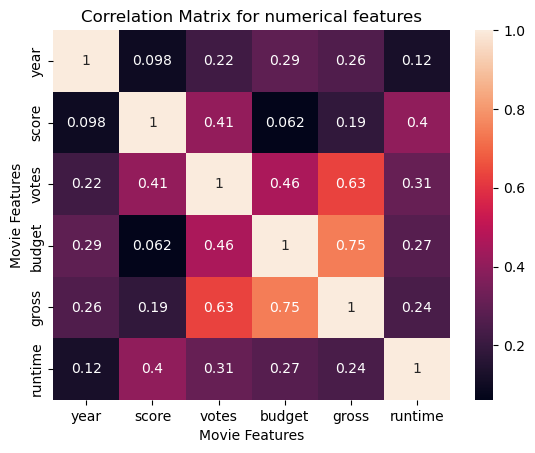

In [94]:
#heatmap correlation matrix
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for numerical features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [95]:
#Change objects to numerical values
df_num = df

for col_name in df_num.columns:
    if(df_num[col_name].dtype=='object'):
        df_num[col_name]=df_num[col_name].astype('category')
        df_num[col_name]=df_num[col_name].cat.codes
        


In [96]:
df_num.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_release,year_release
0,6586,6,6,1980,1705,8.4,927000.0,2589,4014,1047,56,19000000,46998772,2319,146.0,210,0
1,5572,6,1,1980,1492,5.8,65000.0,2269,1632,327,56,4500000,58853106,731,104.0,186,0
2,5141,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,56,18000000,538375067,1540,124.0,221,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,56,3500000,83453539,1812,88.0,186,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,56,6000000,39846344,1777,98.0,192,0


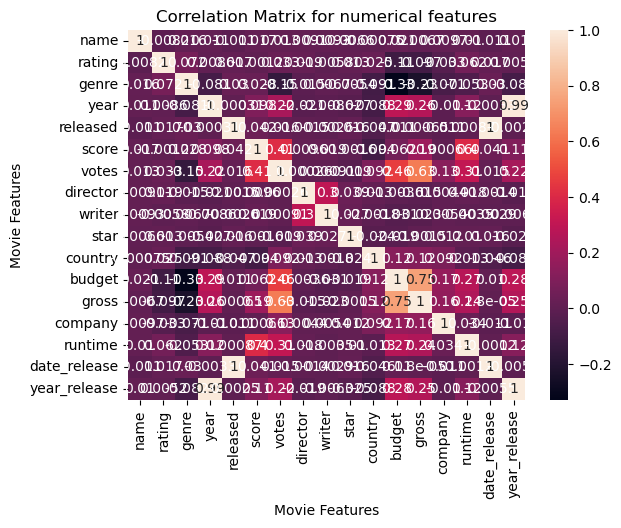

In [97]:
#heatmap correlation matrix
correlation_matrix = df_num.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for numerical features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [98]:
#correlation matrix
correlation_mat = df_num.corr(method='pearson')

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()
# looking at correlations above .5
sorted_pairs[(sorted_pairs)>.5]

gross         votes           0.632119
votes         gross           0.632119
gross         budget          0.745875
budget        gross           0.745875
year_release  year            0.993134
year          year_release    0.993134
released      date_release    0.999767
date_release  released        0.999767
name          name            1.000000
writer        writer          1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
date_release  date_release    1.000000
year_release  year_release    1.000000
dtype: float64

In [99]:
#Votes and budget have the highest correlation to gross earnings